In [1]:
import geojson
import geopandas as gpd
import contextily as ctx
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from descartes import PolygonPatch

In [2]:
#grid 3586 - working area
#grid 4283 - transport area
#grid 5339 - home area

dfs = pd.DataFrame({})

for i in range(1,10):
    df = pd.read_csv('./sms-call-internet-mi-2013-11-0{}.csv'.format(i), parse_dates=['time'])
    dfs = dfs.append(df)
df = pd.read_csv('./sms-call-internet-mi-2013-11-10.csv', parse_dates=['time'])
dfs = dfs.append(df)
dfs = dfs.fillna(0)

In [3]:
#Group by hours and aggregate values according to the hour
dfgr = dfs[['cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['time', 'cellid'], as_index=False).sum()
dfgr['hour'] = dfgr.time.dt.hour+24*(dfgr.time.dt.day-1)
dfgr = dfgr.set_index(['hour']).sort_index()

In [4]:
dfgr.head()

,time,cellid,smsin,smsout,callin,callout,internet
hour,,,,,,,
0,2013-11-01,1,0.223227,0.156787,0.160938,0.052275,11.028366
0,2013-11-01,2,0.222201,0.147617,0.164946,0.054712,11.058225
0,2013-11-01,3,0.221109,0.137855,0.169213,0.057306,11.090008
0,2013-11-01,4,0.226198,0.183349,0.149327,0.045216,10.941881
0,2013-11-01,5,0.205065,0.175393,0.139139,0.043455,9.916548


In [5]:
#dfgr.describe()
#########################################################
#From 01-11 to 09-11 (01,02,03 are weekend/festive days)#
#########################################################

In [6]:
print("CELL 3586 - office area")

CELL 3586 - office area


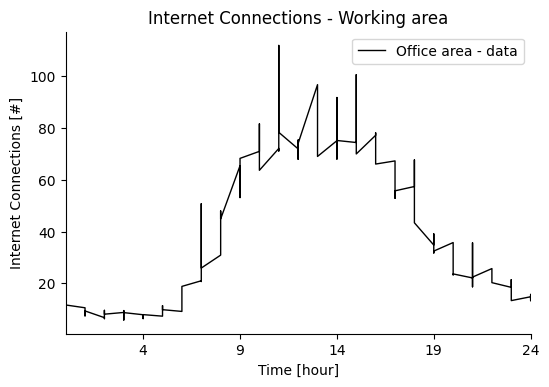

In [7]:
#Office area - industrial zone
ydata = dfgr[dfgr.cellid==3586]['internet']
xdata = dfgr[dfgr.cellid==3586]['internet'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Working area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24]) #working day - weekday
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

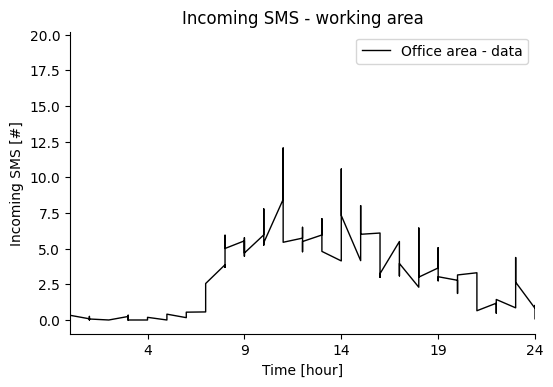

In [8]:

ydata = dfgr[dfgr.cellid==3586]['smsin']
xdata = dfgr[dfgr.cellid==3586]['smsin'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

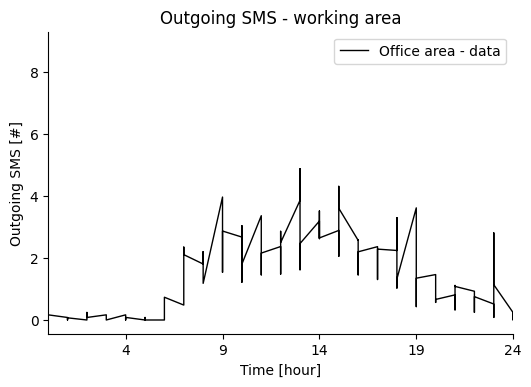

In [9]:

ydata = dfgr[dfgr.cellid==3586]['smsout']
xdata = dfgr[dfgr.cellid==3586]['smsout'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

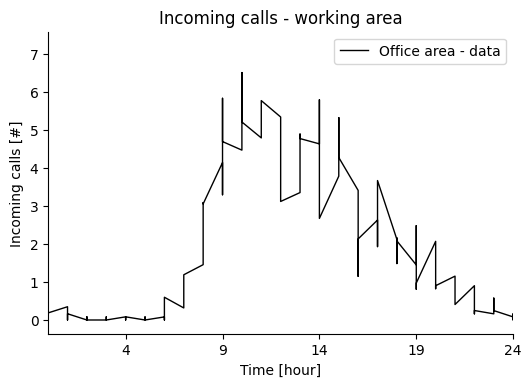

In [10]:

ydata = dfgr[dfgr.cellid==3586]['callin']
xdata = dfgr[dfgr.cellid==3586]['callin'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.xlim([0,168])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

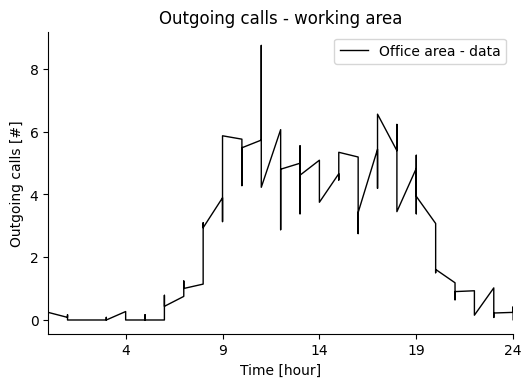

In [11]:

ydata = dfgr[dfgr.cellid==3586]['callout']
xdata = dfgr[dfgr.cellid==3586]['callout'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

In [12]:
print("CELL 4283 - transport area - highway")

CELL 4283 - transport area - highway


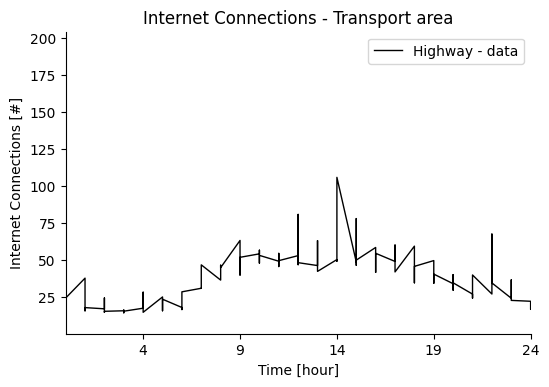

In [13]:
#Transport area (highway) data
ydata = dfgr[dfgr.cellid==4283]['internet']
xdata = dfgr[dfgr.cellid==4283]['internet'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Internet Connections - Transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

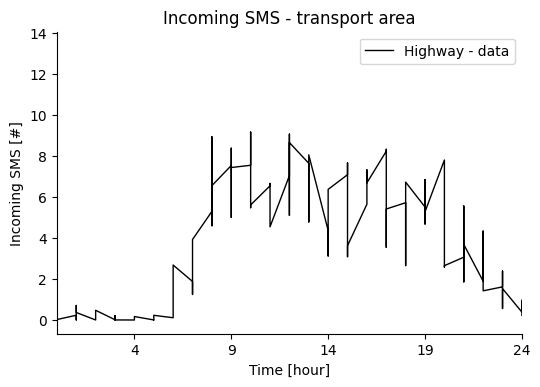

In [14]:

ydata = dfgr[dfgr.cellid==4283]['smsin']
xdata = dfgr[dfgr.cellid==4283]['smsin'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

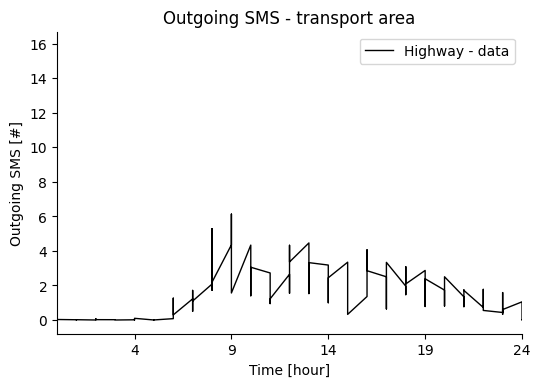

In [15]:

ydata = dfgr[dfgr.cellid==4283]['smsout']
xdata = dfgr[dfgr.cellid==4283]['smsout'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

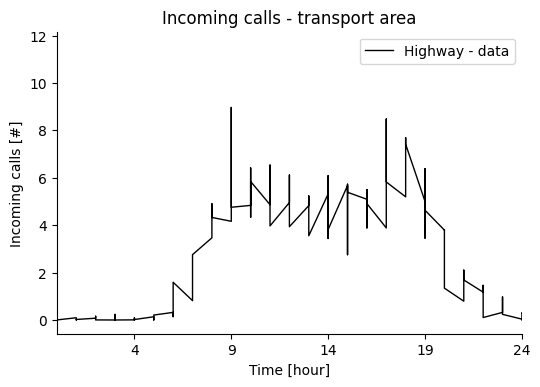

In [16]:

ydata = dfgr[dfgr.cellid==4283]['callin']
xdata = dfgr[dfgr.cellid==4283]['callin'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

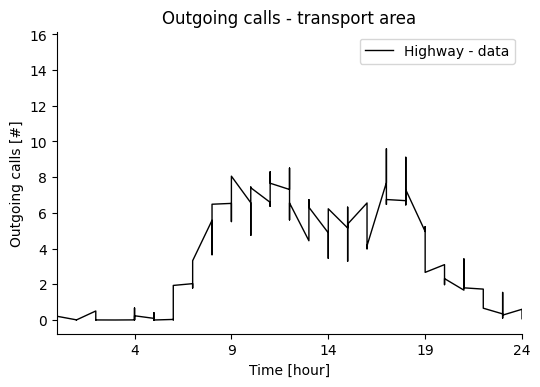

In [17]:

ydata = dfgr[dfgr.cellid==4283]['callout']
xdata = dfgr[dfgr.cellid==4283]['callout'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

In [18]:
print("CELL 5343 - home area - Via Rembrandt")

CELL 5343 - home area - Via Rembrandt


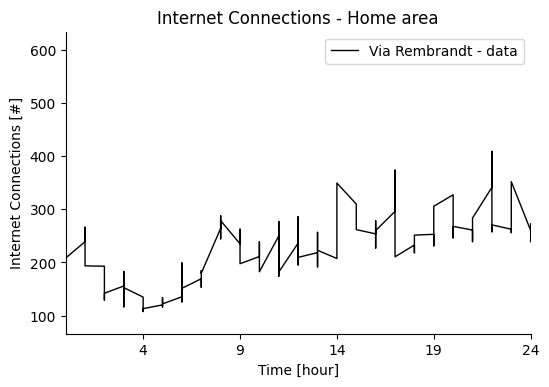

In [19]:
#Home area (near Via Rembrandt) data
ydata = dfgr[dfgr.cellid==5343]['internet']
xdata = dfgr[dfgr.cellid==5343]['internet'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Internet Connections - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

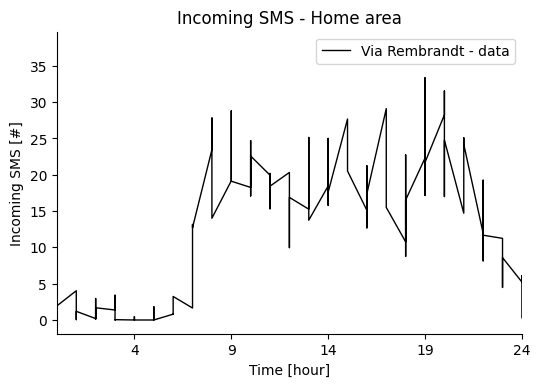

In [20]:

ydata = dfgr[dfgr.cellid==5343]['smsin']
xdata = dfgr[dfgr.cellid==5343]['smsin'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

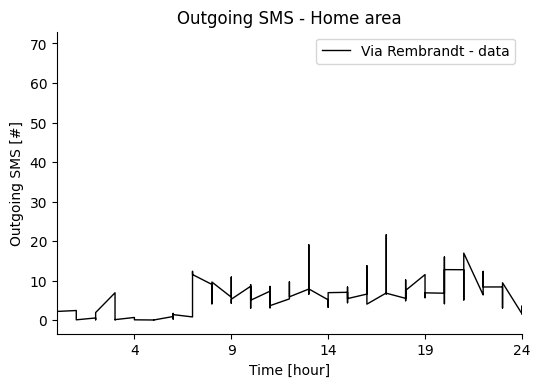

In [21]:

ydata = dfgr[dfgr.cellid==5343]['smsout']
xdata = dfgr[dfgr.cellid==5343]['smsout'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

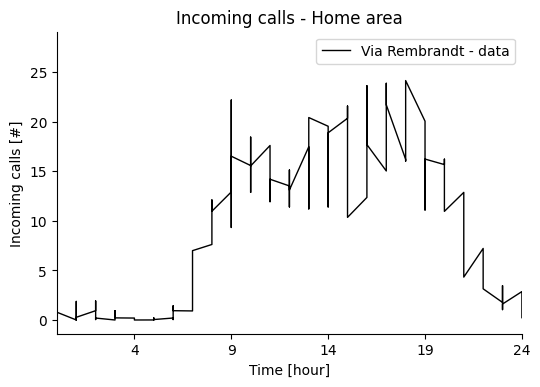

In [22]:

ydata = dfgr[dfgr.cellid==5343]['callin']
xdata = dfgr[dfgr.cellid==5343]['callin'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()

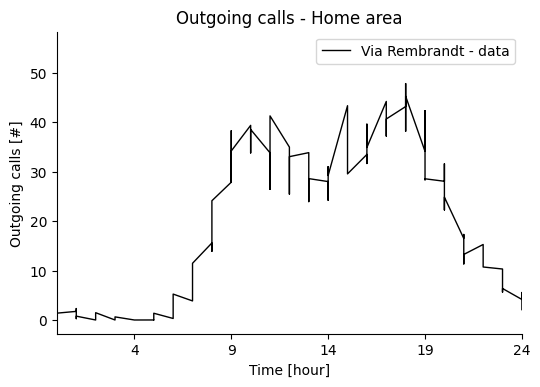

In [23]:

ydata = dfgr[dfgr.cellid==5343]['callout']
xdata = dfgr[dfgr.cellid==5343]['callout'].index

f = plt.figure(dpi=100)
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks([100, 105, 110, 115, 120], [4, 9, 14, 19, 24])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.show()